In [1]:
from pyo import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fs = 44100

In [3]:
x = np.random.random(fs*10)

In [25]:
s = Server().boot()

Pyo warning: Portaudio input device `G Money Bose` has fewer channels (1) than requested (2).
Pyo warning: Portmidi warning: no midi device found!
Portmidi closed.


In [6]:
bs = s.getBufferSize()

In [7]:
bs

256

In [26]:
s.start()

In [27]:
t = DataTable(size=x.shape[0])

In [28]:
osc = TableRead(t, freq=t.getRate(), loop=True, mul=0.1).out()

In [29]:
arr = np.asarray(t.getBuffer())

In [22]:
arr[:] = x

In [23]:
out = EQ(osc).out()

In [30]:
def process(x, osc):
    "Fill the array (so the table) with white noise."
    arr[:] = x
    out = EQ(osc).out()
    return out

In [31]:
out = process(x, osc)

In [32]:
def done(t):
    # call when the recording is finished.
    # do your offline processing here...
    arr = np.asarray(t.getBuffer())
    return arr

t = DataTable(size=x.shape[0], chnls=1)
# a = Sine(1000, mul=0.5)
b = TableRec(out, t, 0.01).play()
tf = TrigFunc(b["trig"], function=done, arg=t)

In [36]:
y = done(t)

In [37]:
y[0:10]

array([0.        , 0.00020905, 0.00023514, 0.00015543, 0.00052601,
       0.00043304, 0.00037448, 0.0005478 , 0.00177076, 0.00126263],
      dtype=float32)

In [38]:
s.shutdown()

In [15]:
y[0:10]

array([0.0000000e+00, 1.8961185e-04, 8.0942569e-05, 4.5106269e-04,
       3.8927436e-04, 9.0914726e-04, 2.8207139e-04, 1.2537891e-03,
       1.8276347e-04, 9.0757658e-04], dtype=float32)

In [ ]:
plt.plot(y)

In [77]:
osc.play()

< Instance of TableRead class >

In [84]:
s.stop()

In [58]:
arr[0:10]

array([0.97949916, 0.7476828 , 0.82571185, 0.21870765, 0.8955021 ,
       0.91623145, 0.5562409 , 0.4770229 , 0.5955816 , 0.13141596],
      dtype=float32)

In [34]:
t.get(pos=251)

-0.06259220838546753

In [32]:
type(t)

pyo.lib.tables.DataTable

In [17]:
s.setCallback(process)

In [41]:
type(osc)

pyo.lib.tableprocess.TableRead

In [47]:
for i in range(10):
    process()

In [22]:
def done():
    # call when the recording is finished.
    # do your offline processing here...
    arr = np.asarray(t.getBuffer())
    b = TableRec(a, t, 0.01).play()
    return arr

t = DataTable(size=88200, chnls=1)

In [23]:
a = Sine(1000, mul=0.5)

In [24]:
b = TableRec(a, t, 0.01).play()

In [25]:
tf = TrigFunc(b["trig"], function=done)

In [26]:
done()

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

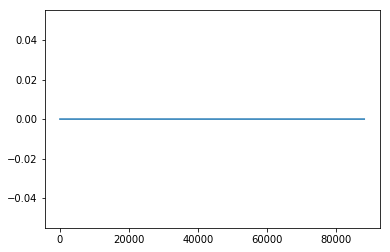

In [10]:
plt.plot(x)